In [ ]:
import numpy as np
import pandas as pd

#for visualization of the data
import matplotlib.pyplot as plt
import seaborn as sns

#to split train and test data set
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer    #for feature scaling

# for checking accuracy, precision, f1score, confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# regular expression
import re
# string manipulation
import string

In [ ]:
true_data=pd.read_csv("/content/True.csv")
fake_data = pd.read_csv("/content/Fake.csv")

In [ ]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_data['class']=1
fake_data['class']=0

In [ ]:
true_data.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
fake_data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
true_data.shape , fake_data.shape

((21417, 5), (23481, 5))

In [ ]:
data=pd.concat([true_data,fake_data],axis=0)
data.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
data.drop(['title','subject','date'],axis=1,inplace=True)

In [ ]:
data.head()

,text,class
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [ ]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [ ]:
data=data.sample(frac=1)

In [ ]:
data.head()

,text,class
10252,Liberal heads explode in 5 4 3 2 1President Tr...,0
18745,Austria s President really said this! During a...,0
7043,New York Daily News stooped incredibly low on ...,0
4285,Appearing on NBC s Meet The Press Sunday morni...,0
16918,BERLIN (Reuters) - Germany hopes to resume its...,1


In [ ]:
data.reset_index(inplace = True)
data.head()

,index,text,class
0,10252,Liberal heads explode in 5 4 3 2 1President Tr...,0
1,18745,Austria s President really said this! During a...,0
2,7043,New York Daily News stooped incredibly low on ...,0
3,4285,Appearing on NBC s Meet The Press Sunday morni...,0
4,16918,BERLIN (Reuters) - Germany hopes to resume its...,1


In [ ]:
data.drop(["index"], axis = 1, inplace = True)

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
x=data['text']
y=data['class']

In [ ]:
tfv=TfidfVectorizer()
x=tfv.fit_transform(x)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_lr=lr_model.predict(X_test)

In [ ]:
y_pred_lr

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
accuracy_score(y_pred_lr,y_test)

0.9869710467706013

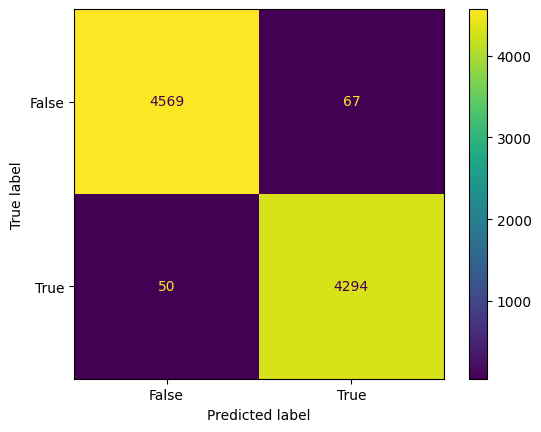

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])

cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4619
           1       0.99      0.98      0.99      4361

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc=dtc_model.predict(X_test)

In [ ]:
y_pred_dtc


array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
accuracy_score(y_pred_dtc,y_test)

0.9966592427616926

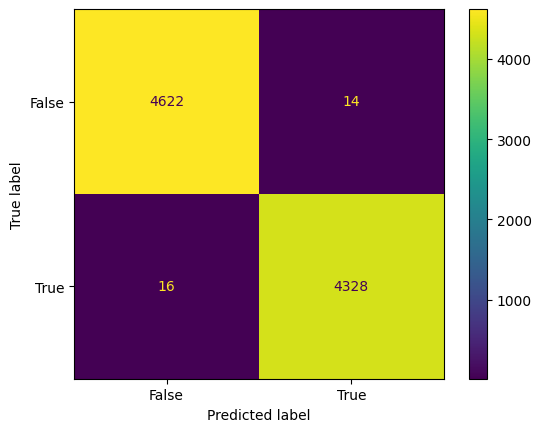

In [ ]:
cm = confusion_matrix(y_test, y_pred_dtc)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])

cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4638
           1       1.00      1.00      1.00      4342

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model= RandomForestClassifier(n_estimators=100,criterion='entropy')
rfc_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
y_pred_rfc=rfc_model.predict(X_test)

In [ ]:
y_pred_rfc

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
accuracy_score(y_test,y_pred_rfc)

0.9887527839643653

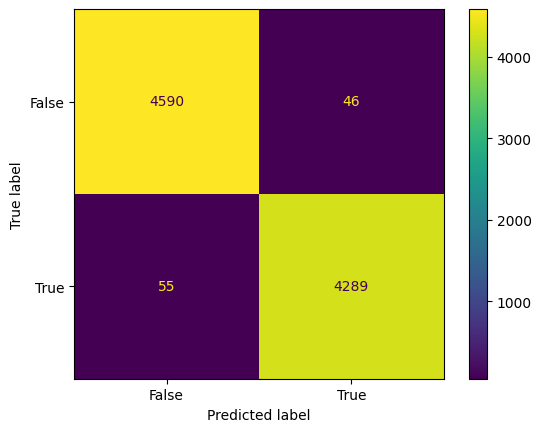

In [ ]:
cm = confusion_matrix(y_test, y_pred_rfc)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False, True])

cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_pred_rfc,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4645
           1       0.99      0.99      0.99      4335

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
def checking_our_value():


    x=X_train[100]


    print('Logistic Regression',output(lr_model.predict(x)))
    print('Random Forest Classifier',output(rfc_model.predict(x)))
    print('Decision Tree Classifier',output(dtc_model.predict(x)))




def output(n):

    if n==1:

        return 'True news'

    else:
         return 'Fake news'

In [ ]:
checking_our_value()

Logistic Regression Fake news
Random Forest Classifier Fake news
Decision Tree Classifier Fake news
